# The Sparks Foundation - Graduate Rotational Internship Program
## Task 1: Prediction using Supervised ML
## Author: Bhagya Shree Sonowal
## Problem Statement: Predict percentage of a student based on the number of study hours using Linear Regression.

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read and store data in DataFrame

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.isnull().sum()  #check if any data is missing

Hours     0
Scores    0
dtype: int64

### Plot the data for data visualization

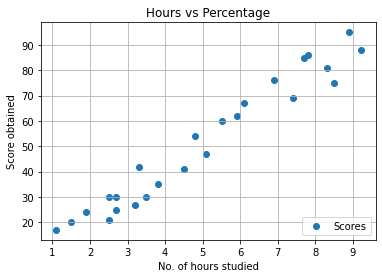

In [5]:
plt.scatter(data['Hours'],data['Scores'],label="Scores")
plt.title("Hours vs Percentage")
plt.xlabel("No. of hours studied")
plt.ylabel("Score obtained")
plt.legend(loc=4)
plt.grid()
plt.show()

### Select attributes and labels

In [6]:
x = data[["Hours"]].values    ## 2-D array
y = data["Scores"].values

### Split data into training and testing data using Scikit Learn

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state = 0)

In [8]:
xtrain.shape

(20, 1)

In [9]:
xtest.shape

(5, 1)

### Build the Linear Regression model
#### 1. Define the model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### 2. Fit(Train) the model

In [11]:
model.fit(xtrain, ytrain)

LinearRegression()

#### 3. Predict the model - Predictions on testing data

In [12]:
ypred = model.predict(xtest)
ypred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
print("Actual Vs Predicted Score")
df = pd.DataFrame({"Actual Score": ytest, "Predicted Score": ypred})
df

Actual Vs Predicted Score


,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### 4. Model Validation - Evaluate accuracy of model's prediction

In [13]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(ytest, ypred))

Mean Absolute Error: 4.18385989900298


#### Line of Regression

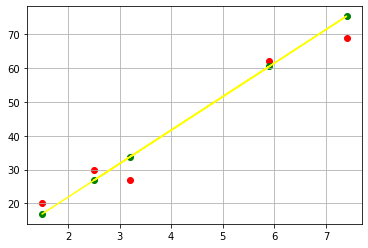

In [14]:
import matplotlib.pyplot as plt
plt.scatter(xtest,ytest,color='red')
plt.scatter(xtest,ypred,color='green')
plt.plot(xtest,ypred,color='yellow')
plt.grid()
plt.show()

In [15]:
m=model.coef_
c=model.intercept_
print(m,c)

[9.91065648] 2.018160041434669


#### R-squared - Goodness of fit

In [16]:
from sklearn.metrics import r2_score
r=r2_score(ytest,ypred)
r

0.9454906892105355

### Predict score

In [17]:
hr = [9.25]
pred = model.predict([hr])
print("Predicted Score:",format(pred[0]))

Predicted Score: 93.69173248737538
